In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [12]:
df = pd.read_csv(os.path.join('/Users/tan/PID-case-report', 'cell frequency.csv'), 
                         dtype={'Sample ID':str})
sampleName = ['PID017.1','PID017.2','PID017.3',
              'PID019.1','PID020.1',
              '72_morv1','72_farv1',
              '135_morv1','135_farv1',]
#sampleName = ['PID017.1',
#              'PID019.1','PID020.1',
#              '72_morv1','72_farv1',
#              '135_morv1','135_farv1',]

In [3]:
df

,level1,level2,PID019.1,PID020.1,PID017.1,PID017.2,PID017.3,72_morv1,72_farv1,135_morv1,135_farv1
0,B,IgD+ Memory B,0.000162,0.000058,0.000333,0.000258,0.000242,0.000113,0.000147,0.000000,0.000605
1,B,IgD- memory B,0.004216,0.011638,0.003313,0.006544,0.006097,0.007929,0.006781,0.006729,0.011501
2,B,Naive B,0.030420,0.051541,0.043642,0.024528,0.021971,0.060150,0.045401,0.046209,0.070218
3,B,Transitional B,0.000136,0.000399,0.000000,0.000208,0.000207,0.000340,0.000000,0.000000,0.000605
4,B,plasmablasts,0.000192,0.000144,0.000016,0.000018,0.000059,0.000227,0.000000,0.000000,0.000605
5,CD4T,Central memory CD4T,0.010337,0.001608,0.009473,0.030044,0.026260,0.014046,0.021669,0.011664,0.011501
6,CD4T,Effector memory CD4T,0.017920,0.009034,0.015194,0.028891,0.024541,0.018124,0.038325,0.028712,0.032688
7,CD4T,Naive CD4 T,0.061983,0.121800,0.235632,0.044722,0.051558,0.130154,0.105837,0.134590,0.121671
8,CD4T,Naive Tregs,0.010984,0.007556,0.015389,0.008112,0.006942,0.011894,0.011055,0.019740,0.017554
9,CD4T,memory Tregs,0.006930,0.003008,0.004860,0.009269,0.008306,0.006457,0.009729,0.012562,0.013317


In [37]:
level1name = df.level1.unique()
dfList = []
for i in range(len(level1name)):
    tmp = df[df.level1==level1name[i]].sum()
    dfList.append(tmp[sampleName])
dfLevel1 = pd.concat(dfList, axis=1)
dfLevel1.columns = df.level1.unique()

In [38]:
dfLevel1

,B,CD4T,CD8T,Eosinophils,MAIT,Monocytes,NK,Neutrophils,Others,basophils,gdT,pDC
PID017.1,0.0473042,0.280549,0.0699291,0.0127782,0.00569275,0.0644516,0.0662625,0.298825,0.135424,0.00525423,0.0120595,0.00134401
PID017.2,0.031556,0.121036,0.0753786,0.00695405,0.0100068,0.113405,0.0148488,0.551602,0.0520585,0.00723996,0.0144384,0.00140649
PID017.3,0.0285763,0.117608,0.0665402,0.0217409,0.0103506,0.0838739,0.0154136,0.579278,0.0567155,0.00584878,0.0120048,0.00170737
PID019.1,0.0351265,0.108155,0.0249965,0.00164284,0.000844168,0.042916,0.0176264,0.623789,0.136841,0.00328568,0.00421073,0.00049538
PID020.1,0.0637806,0.143006,0.0366069,0.00219468,0.00389363,0.0296233,0.0224907,0.417187,0.271038,0.00109253,0.00642041,8.66e-05
72_morv1,0.0687585,0.180675,0.0462166,0.0167648,0.00385138,0.0397599,0.0205029,0.392161,0.216244,0.00124603,0.0114409,0.000339828
72_farv1,0.052329,0.186616,0.0986144,0.0173939,0.0160672,0.0274175,0.0243219,0.392836,0.151828,0.00103184,0.0296285,0.000294811
135_morv1,0.0529385,0.207268,0.0843428,0.0224316,0.00538358,0.0430686,0.0224316,0.290265,0.243158,0,0.0282638,0
135_farv1,0.0835351,0.196731,0.0829298,0.0308717,0.0115012,0.0375303,0.0357143,0.230024,0.271186,0,0.0199758,0


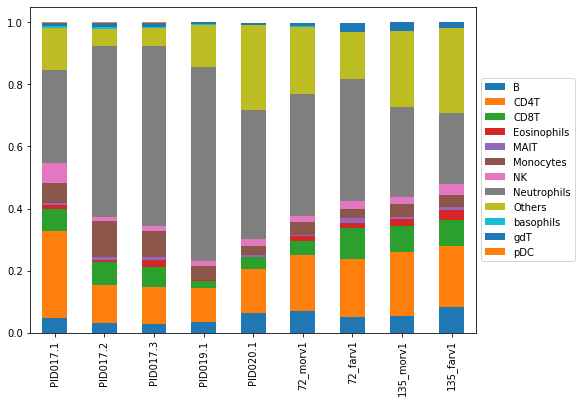

In [21]:
dfLevel1.plot(kind='bar', stacked=True, figsize = (8, 6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('frequency.png', bbox_inches="tight")

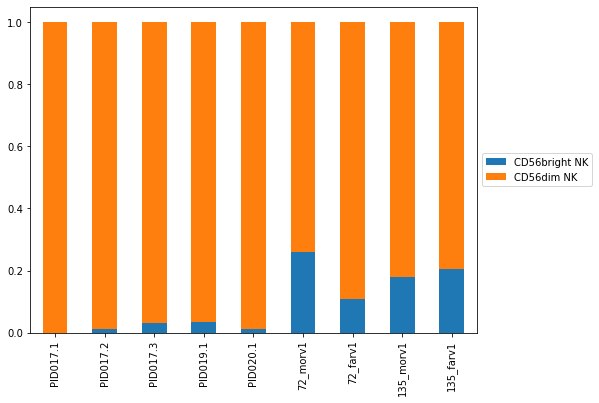

In [60]:
level1name='NK'
df_sub=df[df.level1==level1name]
df_sub[sampleName]=df_sub[sampleName]/df_sub[sampleName].sum(axis=0)

df_sub_tmp=df_sub[sampleName].T
df_sub_tmp.columns=df_sub.level2
df_sub_tmp.plot(kind='bar', stacked=True, figsize = (8, 6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(level1name+'.png', bbox_inches="tight")